<a href="https://colab.research.google.com/github/is0280fp/google_colab/blob/main/GaitRec_get_csv_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# from IPython.core.debugger import Pdb; Pdb().set_trace()
import csv
import tensorflow as tf
import functools
import numpy as np

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_V_PRO_left.csv') as f:
    reader = csv.reader(f)
    V_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_V_PRO_right.csv') as f:
    reader = csv.reader(f)
    V_right = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_AP_PRO_left.csv') as f:
    reader = csv.reader(f)
    AP_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_AP_PRO_right.csv') as f:
    reader = csv.reader(f)
    AP_right = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_ML_PRO_left.csv') as f:
    reader = csv.reader(f)
    ML_left = [row for row in reader]
f.close()

with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_F_ML_PRO_right.csv') as f:
    reader = csv.reader(f)
    ML_right = [row for row in reader]
f.close()

In [11]:
with open('/content/drive/MyDrive/GaitRect/GaitRect/GRF_metadata.csv') as f:
    reader = csv.reader(f)
    metadata = [row for row in reader]
f.close()

meta_items = np.array(metadata, dtype=str)[0,::]
metadata = np.array(metadata)[1:,::]

In [12]:
len(AP_left)
np.array(AP_left).shape
np.array(AP_left)[1:,::].shape

(75732, 104)

In [13]:
# データそれぞれの一番目の文字列を除去し、数字だけにした
V_right_items = np.array(V_right, dtype=str)[0,::]
V_right = np.array(V_right)[1:,::]
V_right = np.array(V_right, dtype=float)

V_left_items = np.array(V_left, dtype=str)[0,::]
V_left = np.array(V_left)[1:,::]
V_left = np.array(V_left, dtype=float)

AP_right_items = np.array(AP_right, dtype=str)[0,::]
AP_right = np.array(AP_right)[1:,::]
AP_right = np.array(AP_right, dtype=float)

AP_left_items = np.array(AP_left, dtype=str)[0,::]
AP_left = np.array(AP_left)[1:,::]
AP_left = np.array(AP_left, dtype=float)

ML_right_items = np.array(ML_right, dtype=str)[0,::]
ML_right = np.array(ML_right)[1:,::]
ML_right = np.array(ML_right, dtype=float)

ML_left_items = np.array(ML_left, dtype=str)[0,::]
ML_left = np.array(ML_left)[1:,::]
ML_left = np.array(ML_left, dtype=float) # ML_left.shape (75732, 104)

In [14]:
AP_left.shape

(75732, 104)

In [15]:
meta_items
SUBJECT_ID = 0
SESSION_ID = 1
CLASS_LABEL = 2
CLASS_LABEL_DETAILED = 3
SEX = 4
AGE = 5
HEIGHT = 6
BODY_WEIGHT = 7
BODY_MASS = 8
SHOE_SIZE = 9
AFFECTED_SIDE = 10
SHOD_CONDITION = 11
ORTHOPEDIC_INSOLE = 12
SPEED = 13
READMISSION = 14
SESSION_TYPE = 15
SESSION_DATE = 16
TRAIN = 17
TRAIN_BALANCED = 18
TEST = 19

In [16]:
metadata_len = len(metadata)

In [17]:
# meta = np.array(meta, dytpe=float) str型や日付など変換できない列があるので、逐次floatに変換忘れない
# metadataの前処理, 3(class_label_detail)と16(year.date)列目削除して
temp1_1 = np.concatenate([metadata[::, SUBJECT_ID].reshape(metadata_len, 1), metadata[::, SESSION_ID].reshape(metadata_len, 1)], axis=1)
temp1_2 = np.concatenate([metadata[::, CLASS_LABEL].reshape(metadata_len, 1), metadata[::, AFFECTED_SIDE].reshape(metadata_len, 1)], axis=1)
temp1_3 = np.concatenate([metadata[::, TRAIN].reshape(metadata_len, 1), metadata[::, TEST].reshape(metadata_len, 1)], axis=1)
temp2 = np.concatenate([temp1_1, temp1_2], axis=1)
metadata = np.concatenate([temp2, temp1_3], axis=1)

In [18]:
metadata.shape

(8971, 6)

In [19]:
# 2列目を5クラスに対応した数字に変換(HC=0, H=1, K=2, A=3, C=4)
metadata = np.where(metadata=='HC', 0, metadata)
metadata = np.where(metadata=='H', 1, metadata)
metadata = np.where(metadata=='K', 2, metadata)
metadata = np.where(metadata=='A', 3, metadata)
metadata = np.where(metadata=='C', 4, metadata)

In [20]:
metadata.shape[1]

6

In [21]:
# V_left_and_meta = []
# V_right_and_meta = []
# AP_left_and_meta = []
# AP_right_and_meta = []
# ML_left_and_meta = []
# ML_right_and_meta = []
# リストはramを食いすぎるので、np.arrayを使うことにした

TRIAL_num = len(AP_left)
metadata_for_GRF = np.zeros([TRIAL_num, metadata.shape[1]])
metadata_for_GRF[:,:] = np.nan # shape (8971, 6)

for i in range(metadata.shape[0]):
  index = np.array(np.where(AP_left[::, SESSION_ID] == int(metadata[i, SESSION_ID]))[0]) # 問題
  index = np.array(index)
  for k in index:
    # from IPython.core.debugger import Pdb; Pdb().set_trace()
    metadata_for_GRF[k, ::] = metadata[i, ::]


In [22]:
subject_id = 0
session_id = 1
class_label = 2
affected_side = 3
train = 4
test = 5

In [23]:
TRIAL_num

75732

In [24]:
metadata_for_GRF.shape

(75732, 6)

In [25]:
metadata_for_GRF[::, class_label]

array([4., 4., 4., ..., 0., 0., 0.])

In [26]:
print(np.sum(np.isnan(metadata_for_GRF))) # HCの場合、Affected_sideはNaN
print(np.array(np.where(metadata_for_GRF[::, class_label] == 0)).shape)


7755
(1, 7755)


In [27]:
# GRFをV,AP,MLの順に横に並べる
# AFFECTED_SIDEによって横に並ぶ順番を決める
# trainとtestデータにわける

V_left = V_left[::,3::]
V_right = V_right[::,3::]
AP_left = AP_left[::,3::]
AP_right = AP_right[::,3::]
ML_left = ML_left[::,3::]
ML_right = ML_right[::,3::]

V_left = V_left.reshape(V_left.shape[0], 1, V_left.shape[1])
V_right = V_right.reshape(V_right.shape[0], 1, V_right.shape[1])
AP_left = AP_left.reshape(AP_left.shape[0], 1, AP_left.shape[1])
AP_right = AP_right.reshape(AP_right.shape[0], 1, AP_right.shape[1])
ML_left = ML_left.reshape(ML_left.shape[0], 1, ML_left.shape[1])
ML_right = ML_right.reshape(ML_right.shape[0], 1, ML_right.shape[1])

In [28]:
# データのみ
right_GRF = np.concatenate([ML_right, AP_right, V_right], axis=2)
left_GRF = np.concatenate([ML_left, AP_left, V_left], axis=2)

In [29]:
print(right_GRF.shape)
right_GRF[0].shape

(75732, 1, 303)


(1, 303)

In [30]:
np.concatenate([right_GRF[0], left_GRF[0]], axis=1).shape

(1, 606)

In [31]:
# AFFECTED_SIDEによって横に並ぶ順番を決める
import random

GRF = []
for i in range(TRIAL_num):
  if metadata_for_GRF[i, class_label] > 0:    # patient
    if metadata_for_GRF[i, affected_side] == 0: # affected_leg is left
      # from IPython.core.debugger import Pdb; Pdb().set_trace()   
      GRF.append(np.concatenate([left_GRF[i], right_GRF[i]], axis=1))
    elif metadata_for_GRF[i, affected_side] == 1:  # affected_leg is right
      GRF.append(np.concatenate([right_GRF[i], left_GRF[i]], axis=1))
    else: 
      # from IPython.core.debugger import Pdb; Pdb().set_trace()                                 # affected_leg is both
      lst = []
      lst.append(right_GRF[i])
      lst.append(left_GRF[i])
      random.shuffle(lst)
      GRF.append(np.concatenate([np.array(lst[0]), np.array(lst[1])], axis=1)) 
  else:                                    # healthy control
    lst = []
    lst.append(right_GRF[0])
    lst.append(left_GRF[0])
    random.shuffle(lst)
    GRF.append(np.concatenate([np.array(lst[0]), np.array(lst[1])], axis=1)) 

In [32]:
print(np.array(GRF).shape)
GRF = np.array(GRF)
print(np.array(GRF).shape)

(75732, 1, 606)
(75732, 1, 606)


In [33]:
# trainとtestデータにわける
# この時点では、まだGRFとV_PRO_right_and_metaの順番は同じはず
# なのでこの時点で対応する正解データも作らないといけない
# 5クラス分類(HC vs H vs K vs A vs C)
train_data = []
train_data_label = []
test_data = []
test_data_label = []
for i in range(TRIAL_num):
  if metadata_for_GRF[i, test] == 1: # testデータかどうか
    test_data.append(GRF[i])
    test_data_label.append(metadata_for_GRF[i, class_label])
  else:
    train_data.append(GRF[i])
    train_data_label.append(metadata_for_GRF[i, class_label])

In [34]:
# ラベルあっているかチェック
print(metadata_for_GRF[0, class_label])
print(train_data_label[0])

4.0
4.0


In [35]:
print(np.array(test_data).shape)
print(np.array(train_data).shape)

(22987, 1, 606)
(52745, 1, 606)


In [36]:
import pickle

with open("train_data.pickle", mode="wb") as f:
   pickle.dump(train_data, f)

with open("test_data.pickle", mode="wb") as f:
   pickle.dump(test_data, f)

with open("train_data_label.pickle", mode="wb") as f:
   pickle.dump(train_data_label, f)

with open("test_data_label.pickle", mode="wb") as f:
   pickle.dump(test_data_label, f)

with open("train_data.pickle", mode="rb") as f:
   train = pickle.load(f)

with open("test_data.pickle", mode="rb") as f:
   test = pickle.load(f)

with open("train_data_label.pickle", mode="rb") as f:
   train_label = pickle.load(f)

with open("test_data_label.pickle", mode="rb") as f:
   test_label = pickle.load(f)

In [37]:
X = np.array(train)
y = np.array(train_label)

In [38]:
print(X.shape)
print(y.shape)

(52745, 1, 606)
(52745,)


In [39]:
X.shape[1:]

(1, 606)

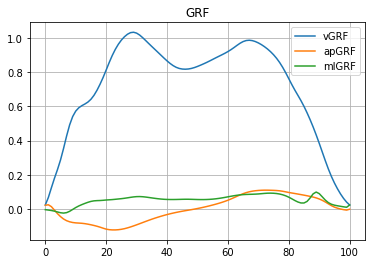

In [40]:
import matplotlib.pyplot as plt
plt.title('GRF')
plt.grid(True)

j = range(101)
# plt.plot(j, X[0, 0, 0:101], label="vGRF")

# plt.plot(j, X[0, 1, 0:101], label='apGRF')

# plt.plot(j, X[0, 2, 0:101], label='mlGRF')

plt.plot(j, X[0, 0, :101], label="vGRF")

plt.plot(j, X[0, 0, 102:203], label='apGRF')

plt.plot(j, X[0, 0, 203:304], label='mlGRF')


plt.legend(loc='best')
plt.show()

In [41]:
np.reshape(X, (-1, 606, 1)).shape

(52745, 606, 1)

In [50]:
import tensorflow as tf
from tensorflow.keras import optimizers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Input, Reshape
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler
import time
import math



NAME = "HC-vs-4class_Patients-CNN"

model = Sequential()

stddeviation = math.pow(606, -0.5)
initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=stddeviation)

X_dammy = np.reshape(X, (-1, 606, 1))

model.add(Conv1D(24, kernel_size=8 , kernel_initializer=initializer, strides=2, input_shape=(606, 1)))
model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(24, kernel_size=8, strides=2))
model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(48, kernel_size=6, strides=3))
model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=3))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(5))
model.add(Activation('softmax'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# 学習率
# def step_decay(iteration):
#     x = 5e-3
#     if e-4 < iteration < e-3: 
#       x = 0.01
#     if iteration : 
#       x = 0.001
#     return x
# lr_decay = LearningRateScheduler(step_decay)

sgd = optimizers.SGD(lr=5e-3)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= sgd,
              metrics=['accuracy'],
              )
model.summary()
model.fit(X_dammy, y,
          batch_size=5,
          epochs=30,
          validation_split=0.3,
          callbacks=[tensorboard])



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 300, 24)           216       
_________________________________________________________________
activation_24 (Activation)   (None, 300, 24)           0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 147, 24)           4632      
_________________________________________________________________
activation_25 (Activation)   (None, 147, 24)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 48, 48)            6960      
_________________________________________________________________
activation_26 (Activation)   (None, 48, 48)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)             